In [2]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv('data/ratings.csv')
books_data = pd.read_csv('data/books.csv')
to_read = pd.read_csv('data/to_read.csv')
display(ratings.head())
display(to_read.head())
display(books_data.head())

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# Rating-based approach

In [4]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [5]:
ratings['mean_book_rating'] = ratings.groupby(['book_id'])['rating'].transform('mean')
ratings['count_book_ratings'] = ratings.groupby(['book_id'])['user_id'].transform('count')

In [6]:
books = ratings[['book_id', 'mean_book_rating', 'count_book_ratings']].drop_duplicates(subset='book_id', keep="first")

In [7]:
C = books['mean_book_rating'].mean()
m = books['count_book_ratings'].quantile(0.70)
books['weighted_average'] = (books.count_book_ratings/(books.count_book_ratings + m) * books.mean_book_rating) + (m/(m + books.count_book_ratings) * C)
books.sort_values('weighted_average', ascending = False, inplace = True)
books = books.merge(books_data[['book_id', 'original_title']], on = 'book_id')

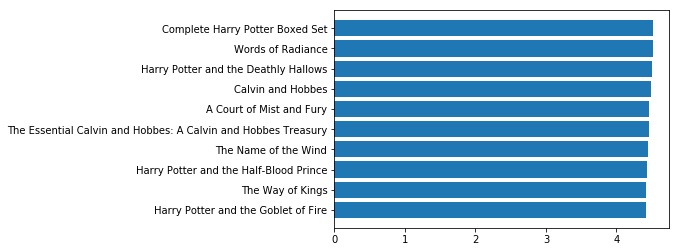

In [8]:
fig,ax = plt.subplots(1) 
ax.barh(np.arange(10), books.weighted_average[:10], align='center', tick_label=books.original_title[:10])
ax.invert_yaxis()

# User based aproach

In [12]:
matrix = np.zeros([max(ratings.user_id) + 1, max(ratings.book_id) + 1])
matrix[ratings.user_id, ratings.book_id]=ratings.rating
matrix.shape

(53425, 10001)

In [16]:
def build_plot(X_tsne):
    plt.figure(figsize=(12,12))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='red')
    plt.title("t-SNE")
    plt.ylabel('Les coordonnees de Y')
    plt.xlabel('Les coordonnees de X')
    plt.legend()
    plt.show()

***Visualize dataset***

No handles with labels found to put in legend.


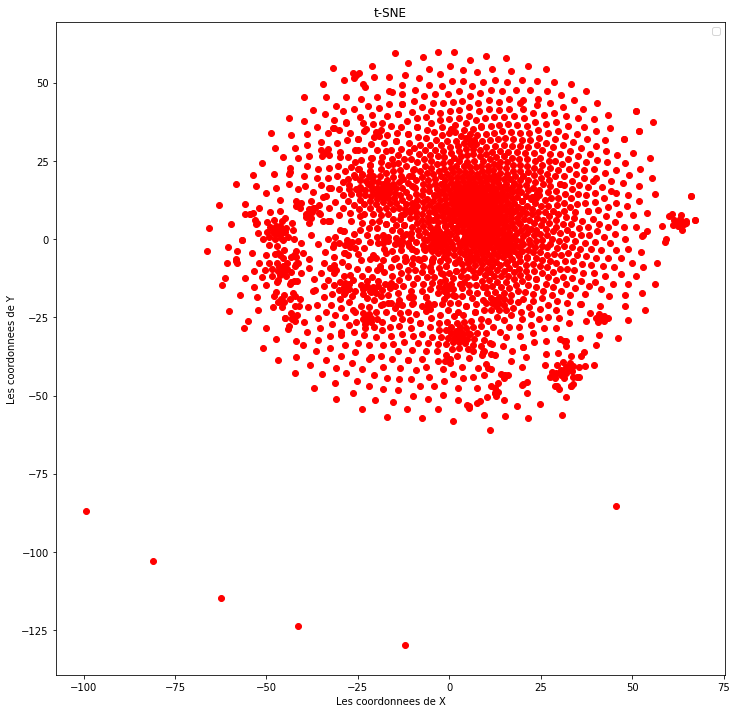

No handles with labels found to put in legend.


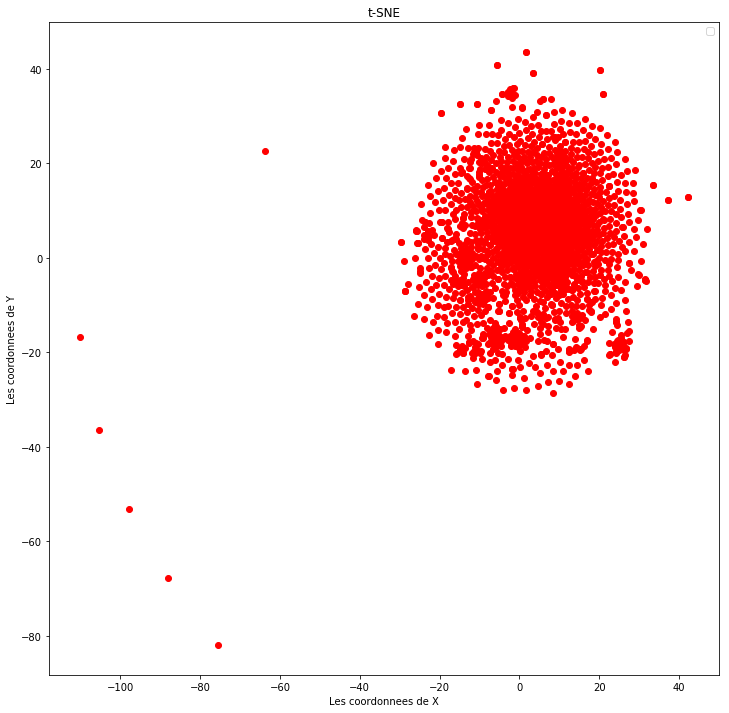

No handles with labels found to put in legend.


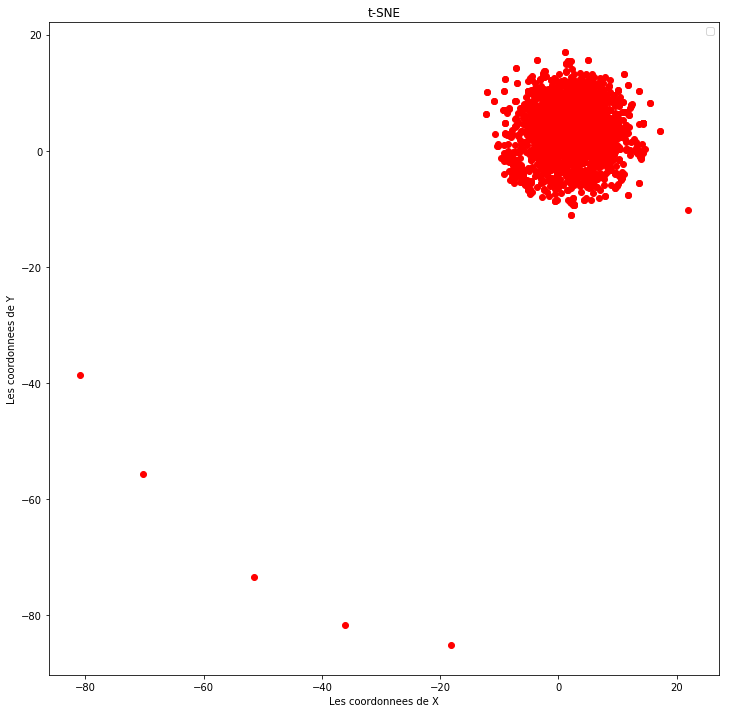

No handles with labels found to put in legend.


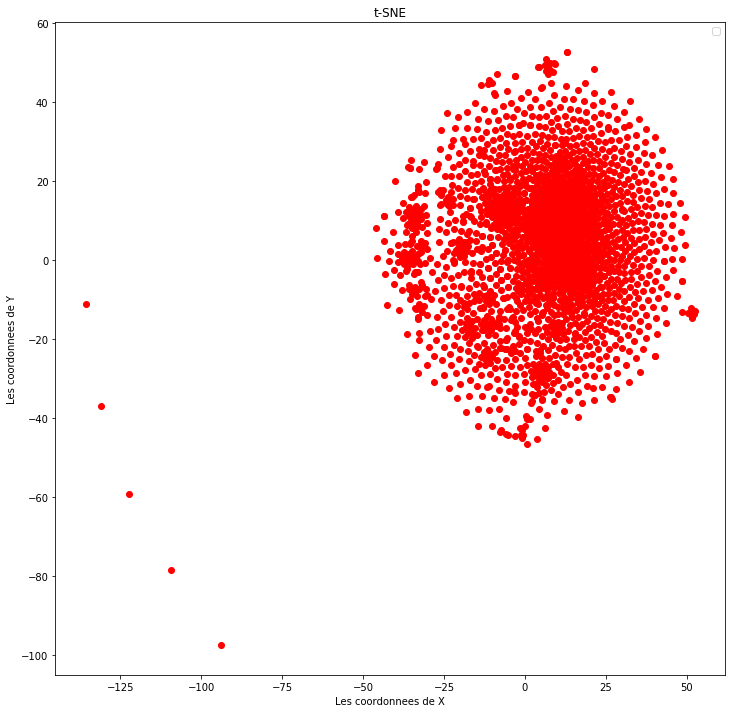

No handles with labels found to put in legend.


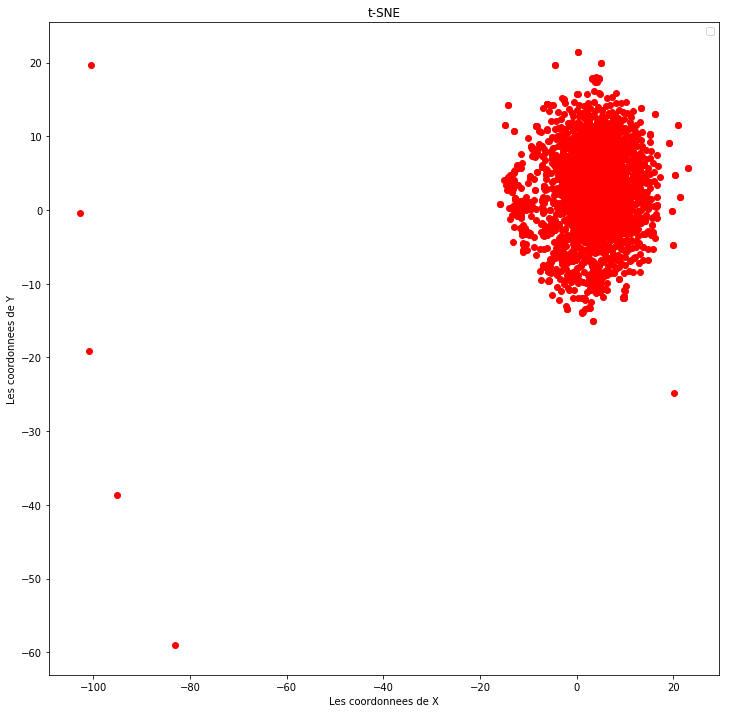

In [21]:
from sklearn.manifold import TSNE
idx = np.random.randint(matrix.shape[0], size=2000)
for lrate in [200, 250, 300, 350, 400]:
    tsne = TSNE(n_components=2, learning_rate=lrate, perplexity = 10, early_exaggeration = 12, init = 'random',  random_state=2019)
    X_tsne = tsne.fit_transform(matrix[idx,:])
    build_plot(X_tsne)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(matrix)

No handles with labels found to put in legend.


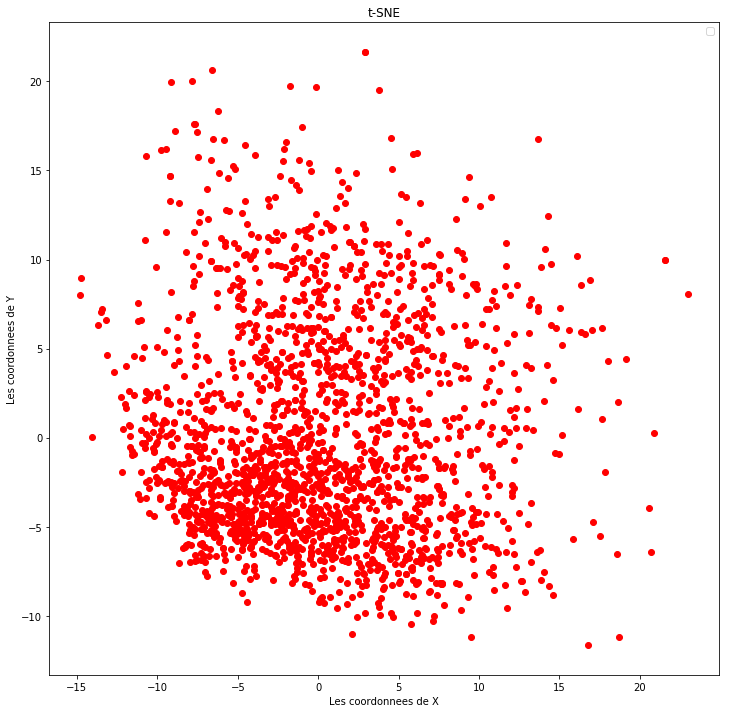

In [29]:
pca_data = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
build_plot(pca_data.to_numpy())

In [12]:
tags = pd.read_csv('data/tags.csv')
book_tags = pd.read_csv('data/book_tags.csv')
tags['count'] = tags.groupby('tag_name')['tag_name'].transform('count')
tags.head()

,tag_id,tag_name,count
0,0,-,1
1,1,--1-,1
2,2,--10-,1
3,3,--12-,1
4,4,--122-,1


In [13]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [11]:
tags[tags['count'] > 0]

,tag_id,tag_name,count
0,0,-,1
1,1,--1-,1
2,2,--10-,1
3,3,--12-,1
4,4,--122-,1
5,5,--166-,1
6,6,--17-,1
7,7,--19-,1
8,8,--2-,1
9,9,--258-,1


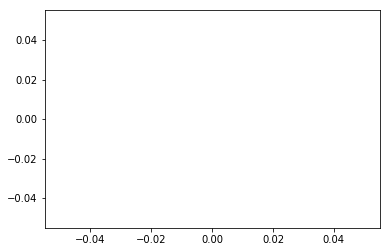

In [6]:
plt.plot()